<a href="https://colab.research.google.com/github/seokjinwoo/EconBigData/blob/main/lec10_%EC%9B%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다중회귀분석(multiple regression analysis)

- 설명변수 $x$가 여러 개임(2개 이상)
- 단순회귀모형의 특성이 그대로 넘어옴

$$
y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_k x_{ki} + e_i
$$

- $\beta_i$ 는 $x_i$가 $y_i$ 에 미치는 순효과(pure effect)

$$
\frac{\partial E[y]}{\partial x_i} = \beta_i
$$

- 이 모형은 OLS(ordinary least square)로 보통 추정함
  - 오차의 제곱의 합이 가장 작아지도록 계수를 추정

- OLS 추정량은 다음과 같음

$$
\hat{\beta} = (X'X)^{-1} X'y
$$






In [ ]:
# multiple regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# data generation
n = 1000
e = np.random.normal(0, 2, size=n)
x1 = np.random.normal(1, 3, n)
x2 = np.random.normal(2, 2, n)

y = 1 + 1*x1 -  2*x2 + e

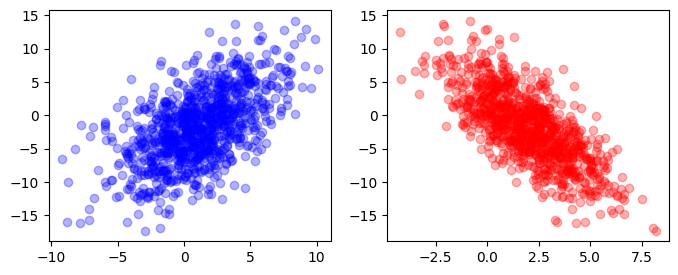

In [ ]:
# y & x1, y & x2 산포도를 그려보시오. 2장을 옆으로 나란히

fig, axes = plt.subplots(1,2, figsize=(8,3))

axes[0].scatter(x1, y, color = 'blue', alpha=0.3)
axes[1].scatter(x2, y, color = 'red', alpha=0.3)

plt.show()


In [ ]:
# Run y on x1, x2 using OLS
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
model = smf.ols('y ~ x1 + x2', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3007.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:08:42   Log-Likelihood:                -2156.2
No. Observations:                1000   AIC:                             4318.
Df Residuals:                     997   BIC:                             4333.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1651      0.097     12.070      0.0

## 결정계수 $R^2$

- $R^2$는 a measure of goodness-of-fit (적합도)
  - 모형의 성능이 어떤지를 측정하는 하나의 숫자.
  - [0,1] 사이의 숫자.

- $R^2$는 선형관계를 측정하는 것이기 때문에, 비선형 관계의 경우에는 관계가 있음에도 불구하고 작아질 수가 있음

- 설명변수가 추가되면, 자동적으로 커지거나 최소한 줄지 않는다.

- 이런 이유로 조정된 결정계수(adjusted $R^2$)를 사용하게 됨




In [ ]:
# Run y on x1, x2 using OLS
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
model = smf.ols('y ~ x1 + x2', data=df).fit()
print(model.summary())

In [ ]:
# x3는 x1, x2 뿐만 아니라 y와도 아무 상관 없는 확률변수임
x3 = np.random.normal(3,3,n)

df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})
model = smf.ols('y ~ x1 + x2 + x3', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2003.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        05:40:30   Log-Likelihood:                -2156.0
No. Observations:                1000   AIC:                             4320.
Df Residuals:                     996   BIC:                             4340.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1264      0.117      9.651      0.0

## 더미변수의 활용(ch.14)

- 더미변수(dummy variable): 특정한 조건을 만족시키면 1, 아니면 0을 갖는 확률변수

- 성별 더미
- 성별 임금 격차(40%)

$$
W_i = \beta_0 + \beta_1 G_i + e_i
$$

- $G_i$는 여성이면 1, 아니면 0
- $\beta_1$ 은 여성과 남성의 임금 격차

$$
E[W|G=1] = \beta_0 + \beta_1
$$
$$
E[W|G=0] = \beta_0
$$
이기 때문에
$$
\beta_1 = E[W|G=1] - E[W|G=0]
$$

























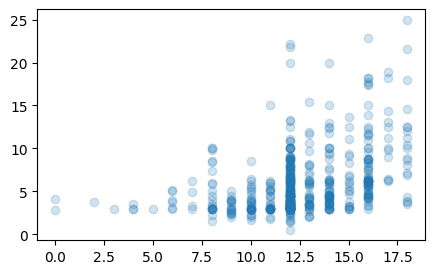

In [ ]:
# 남녀 임금 격차 추정
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv('/content/wage1.csv')

# scattergram betwee wage(세로축) and educ(가로축)
plt.figure(figsize=(5,3))
plt.scatter(df['educ'], df['wage'], alpha=0.2)
plt.show()

- 다음과 회귀모형을 추정함

$$
W_i = \beta_0 + \beta_1 G_i +\beta_2 educ_i + e_i
$$


In [ ]:
# wage differential by gender

model = smf.ols('wage ~ female + educ', data=df).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     91.32
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           9.66e-35
Time:                        06:33:55   Log-Likelihood:                -1354.3
No. Observations:                 526   AIC:                             2715.
Df Residuals:                     523   BIC:                             2727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6228      0.673      0.926      0.3

## 상호작용항(interaction term)

- 남녀 임금 방정식의 기울기가 다를 수 있는 경우를 허용함


$$
W_i = \beta_0 + \beta_1 G_i +\beta_2 educ_i + \beta_3 educ_i \times G_i + e_i
$$

In [ ]:
# 상호작용항을 고려해줌

df['femaleXeduc'] = df['female'] * df['educ']

model = smf.ols('wage ~ female + educ + femaleXeduc', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     61.07
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           7.44e-34
Time:                        06:42:57   Log-Likelihood:                -1353.9
No. Observations:                 526   AIC:                             2716.
Df Residuals:                     522   BIC:                             2733.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2005      0.844      0.238      

- 회귀모형은 될 수 있으면 간단해야 함(parsimonious)

- 설명변수가 늘어나면 편이(bias)는 줄어들기는 하지만,
- 분산(variance)가 커지게 되면서,

- 전체적으로는 상충관계(trade-off)가 발생하게 됨

- model selection criterion: 어떤 모형이 좋은 모형이냐.

